In [1]:
import urllib.request
import os
import matplotlib.pyplot as plt
import numpy as np
import astroML
import scipy

<p>Q1. In the class, we demonstrated the Central Limit Theorem for a sample drawn from a uniform distribution.Reproduce a similar plot for a sample drawn the from chi-square distribution with degrees of freedom equal to 3, for samples drawn once, 5 times, and 10 times. Either plot all of these on one multipanel figure similar to AstroML figure 3.20.</p>

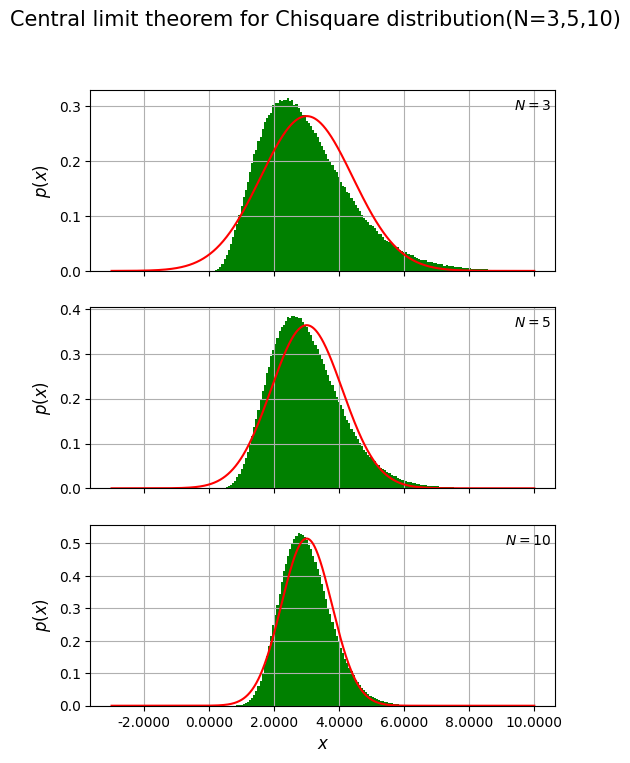

In [2]:
number_of_samples=1E6
number_of_degrees=3

N=[3,5,10]
fig = plt.figure(figsize=(6, 8))

fig.subplots_adjust(hspace=0.2)
fig.suptitle("Central limit theorem for Chisquare distribution(N=3,5,10)", fontsize=15)

x = np.random.chisquare(number_of_degrees,(max(N), int(number_of_samples)))

mean_chisquare=np.mean(x)
sd_chisquare=np.sqrt(np.var(x))

for i in range(len(N)):
    ax = fig.add_subplot(3, 1, i + 1)

    x_mean = x[:N[i], :].mean(0)

    # plotting histogram of the data
    ax.hist(x_mean, bins=np.linspace(-3, 10, 201),density=True,color="green")

    # plot the expected gaussian pdf to compare the results 
    plt.grid()
    sigma = (sd_chisquare/np.sqrt(N[i]))
    dist = scipy.stats.norm(mean_chisquare, sigma)
#     mean of the gaussian distribution is same as mean of the original distribution and standard deviation is sigma/sqrt(N)
    x_pdf = np.linspace(-3, 10, 1000)
    ax.plot(x_pdf, dist.pdf(x_pdf), '-',color="red")

    ax.text(0.99, 0.95, r"$N = %i$" % N[i],
            ha='right', va='top', transform=ax.transAxes)

    if i == len(N) - 1:
        ax.xaxis.set_major_formatter(plt.FormatStrFormatter('%.4f'))
        ax.set_xlabel(r'$x$', fontsize = 12)
    else:
        ax.xaxis.set_major_formatter(plt.NullFormatter())

    ax.set_ylabel('$p(x)$', fontsize = 12)
    
plt.show()

<p>In the above, red line indicates the appropriate guassian distribution that is close enough to our actual curve and green colour indicates original mean of chisquare samples drawn N times.</p>

<p>Q2. The luminosity and redshift of galaxy clusters from XMM-BCS survey (details available at arXiv:1512.01244)
can be downloaded http://www.iith.ac.in/~shantanud/test.dat. Plot the luminosity as a function of redshift on a log-log scale. By eye, do you think the datasets are correlated? Calculate the Spearman, Pearson and Kendall-tau correlation coefficients and the p-value for the null hypothesis.</p>

In [3]:
# Code for downloading the txt file from the https://people.iith.ac.in/shantanud/test.dat
# and stores in text file named data.txt

DOWNLOAD_URL="https://people.iith.ac.in/shantanud/test.dat"
local_path=os.path.join("./","data.txt")
urllib.request.urlretrieve(DOWNLOAD_URL,local_path)

('./data.txt', <http.client.HTTPMessage at 0x1ac493b3910>)

In [4]:
luminous_values=[]
redshift_values=[]

with open("data.txt") as f:
    i=0
    for line in f:
        if(i):
            splitted=line.split(" ")
# read data line by line and split by whitespace to get two floating numbers corresponding to luminosity and redshift 
            luminous_values.append(float(splitted[0]))
            redshift_values.append(float(splitted[1].strip()))
        i=i+1
            
print(luminous_values)
print(redshift_values)
# storing luminous intensity values and redshift values in two seperate arrays

[345.2, 66.3, 684.0, 209.0, 16.0, 91.0, 16.3, 19.4, 310.5, 124.9, 137.9, 93.1, 53.6, 122.1, 25.4, 26.3, 196.9, 68.8, 82.0, 8.4, 319.3, 86.8, 8.7, 37.7, 3.4, 166.0, 104.2, 45.0, 14.5, 38.1, 17.8, 31.1, 89.0, 66.3, 17.7, 4.5, 69.1, 1.1, 6.2, 47.2, 23.4, 160.8, 6.4, 5.1, 134.5, 4.1]
[0.1, 0.04, 0.07, 0.05, 0.02, 0.05, 0.05, 0.04, 0.02, 0.07, 0.001, 0.12, 0.05, 0.04, 0.02, 0.001, 0.09, 0.06, 0.02, 0.001, 0.17, 0.02, 0.001, 0.001, 0.001, 0.06, 0.03, 0.09, 0.001, 0.03, 0.03, 0.04, 0.04, 0.06, 0.05, 0.001, 0.05, 0.001, 0.001, 0.05, 0.001, 0.06, 0.02, 0.02, 0.03, 0.001]


Text(0.5, 1.0, 'Luminosity vs Red shift values on log-log graph')

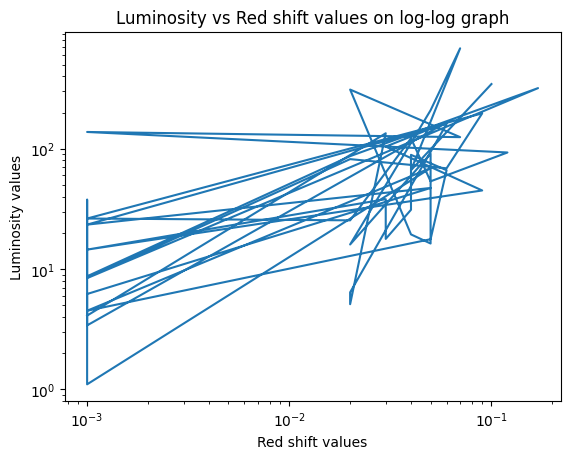

In [5]:
plt.loglog(redshift_values,luminous_values)
plt.xlabel("Red shift values")
plt.ylabel("Luminosity values")
plt.title("Luminosity vs Red shift values on log-log graph")

Text(0.5, 1.0, 'Luminosity vs Red shift values on normal graph')

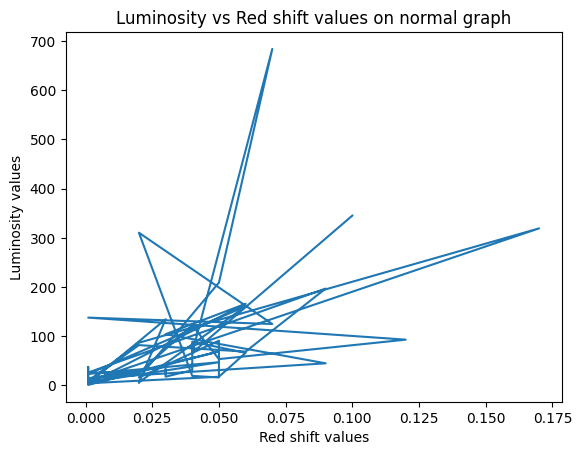

In [6]:
plt.plot(redshift_values,luminous_values)
plt.xlabel("Red shift values")
plt.ylabel("Luminosity values")
plt.title("Luminosity vs Red shift values on normal graph")

Text(0.5, 1.0, 'Luminosity vs Red shift values scatter plot')

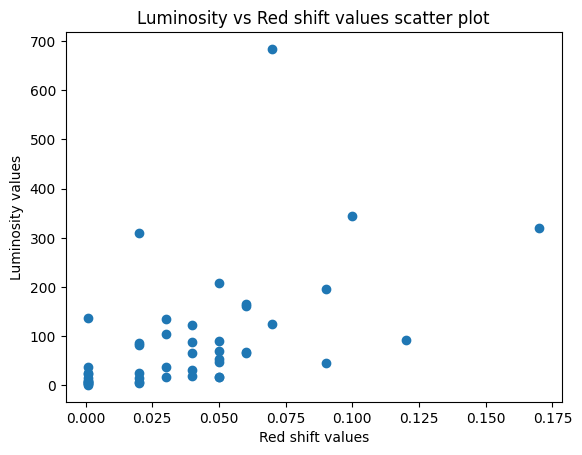

In [7]:
plt.scatter(redshift_values,luminous_values)
plt.xlabel("Red shift values")
plt.ylabel("Luminosity values")
plt.title("Luminosity vs Red shift values scatter plot")

<p>By looking at the above graphs there is clearly some correlation because if there is no correlation then luminosity and red shift values must be independent but from graph we can express luminosity as some complex function of red shift values and viceversa. So they are correlated with some outliers. It is like for simplicity, we can fit a linear model between luminosity and red shift.</p>

In [8]:
corr_coeff,p_value_1 = scipy.stats.pearsonr(redshift_values,luminous_values)
rho,p_value_2 = scipy.stats.spearmanr(redshift_values,luminous_values)
tau,p_value_3 = scipy.stats.kendalltau(redshift_values,luminous_values)

# All correlation coefficients from scipy are calculated two sides 
print("Spearman correlation coefficient:",rho,"& p-value for corresponding null hypothesis:",p_value_2)
print("\n")
print("Pearson correlation coefficient:",corr_coeff,"& p-value for corresponding null hypothesis:",p_value_1)
print("\n")
print("Kendall-tau correlation coefficient:",tau,"pvalue for corresponding null hypothesis is:",p_value_3)

Spearman correlation coefficient: 0.6596325957535454 & p-value for corresponding null hypothesis: 6.16648975908101e-07


Pearson correlation coefficient: 0.5144497852670242 & p-value for corresponding null hypothesis: 0.00025464716576124353


Kendall-tau correlation coefficient: 0.5029584682704178 pvalue for corresponding null hypothesis is: 2.9696862274734036e-06


<p>When we look at different correlation coefficients also, we have significant correlation coefficient between redshift values and luminosity values that proves our claim after looking from graphs. Even we have p value $<$ 0.05 which validates our claim further.</p>

<p>Q3. Wind speed data from the Swiss Wind Power data website can be found at http://wind-data.ch/tools/weibull.php. Using the data provided on the website, plot the probability distribution and overlay the best-fit Weibull distribution (with the parameters shown on the website).</p>

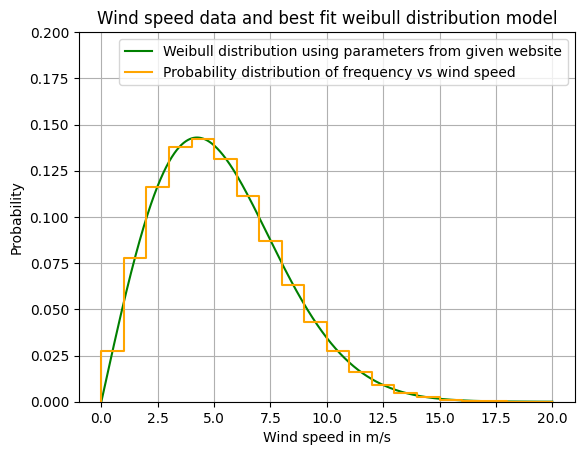

In [9]:
# Data from the website of the above link

frequencypercent=[0.00,2.75,7.80,11.64,13.79,14.2,13.15,11.14,8.72,6.34,4.3,2.73,1.62,0.91,0.48,0.24,0.11,0.05,0.02,0.01,0]
# In the above array each index i corresponds to velocity of wind between i-1,i m/s (first edge I taken 0 because it 
# coincides with x axis = 0)

frequency_percent_pmf=[i/100 for i in frequencypercent]
# The above thing divides each frequency by 100 (because all items in frequencypercent sum upto 100) to convert it into pmf 

def weibull(x,a,k):
    return (k / a) * (x / a)**(k - 1) * np.exp(-(x / a)**k)
#     weibull distribution probability density function

x=np.linspace(0,20,21)
x_t=np.linspace(0,20,1000)
# Information from the website
k_weibull=2
lambda_weibull=6
# 
dist=weibull(x_t,lambda_weibull,k_weibull)
plt.plot(x_t,dist,label='Weibull distribution using parameters from given website',color="green")
plt.step(x,frequency_percent_pmf,label='Probability distribution of frequency vs wind speed',color="orange")
plt.legend()
plt.ylim(0,0.2)
plt.xlabel('Wind speed in m/s')
plt.ylabel('Probability')
plt.title('Wind speed data and best fit weibull distribution model')
plt.grid()
plt.show()


<p>Q4. Generate two arrays of size 1000 drawn from a Gaussian distribution of mean of zero and standard deviation of one. Calculate Pearson correlation coefficient and its p−value using scipy module. Also check if the p− value agrees with that calculated using the Student-t distibution.</p>

In [10]:
arr1=scipy.stats.norm.rvs(size=1000)
arr2=scipy.stats.norm.rvs(size=1000)
# two arrays of size 1000 of default mean(0) and standard deviation(1)

corr_coeff,p_value = scipy.stats.pearsonr(arr1,arr2)
print("Pearson correlation coefficient of two gaussian draws is :",corr_coeff)
print("p-value for corresponding null hypothesis of those two normal distribution draws using scipy is :",p_value)

Pearson correlation coefficient of two gaussian draws is : 0.007634121789937005
p-value for corresponding null hypothesis of those two normal distribution draws using scipy is : 0.8094669930276875


In [11]:
N=1000
t=corr_coeff*np.sqrt((N-2)/(1-((corr_coeff)**2)))

cdfvalue=2*(1-(scipy.stats.t.cdf(t,N-2))) #two times because scipy calculates two sided pearson coefficient 
print('P - value from student t distribution is',cdfvalue)
# verifying with the student-t distribution cdf

P - value from student t distribution is 0.8094669930276845


<p>We can clearly see that p-value from scipy and that from student-t distribution is almost same.</p>